# ML | Credit Card Fraud Detection

## Importing the Libraries

In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

## Import dataset

In [2]:

# Load the dataset from the csv file using pandas 
# best way is to mount the drive on colab and  
# copy the path for the csv file 
data = pd.read_csv("creditcard.csv") 

## Exploratory Data Analysis

In [3]:
# Grab a peek at the data 
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data 
# data = data.sample(frac = 0.1, random_state = 48) 
print(data.shape) 
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

In [5]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [6]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("details of valid transaction") 
valid.Amount.describe() 

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

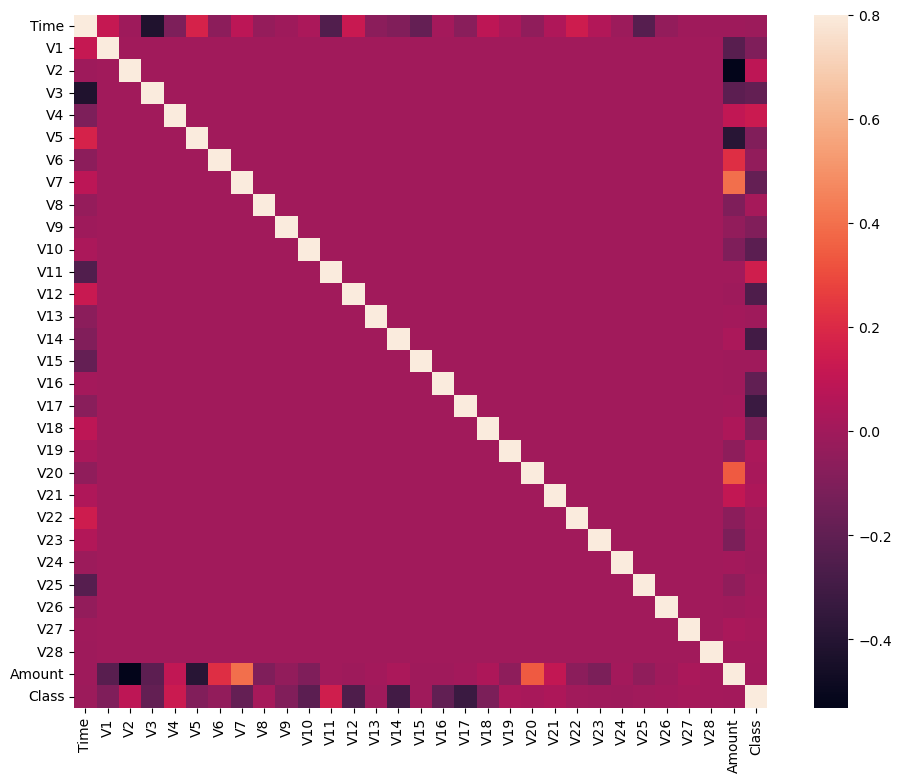

In [8]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

## Declare feature vector and target variable 

In [9]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


## Split data into separate training and test set 

In [10]:
# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42)

# Using Random Forest CLassifier

In [11]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest)

In [35]:
rfc.score(xTest , yTest)

0.9995786664794073

In [36]:
count_misclassified = (yTest != yPred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 24


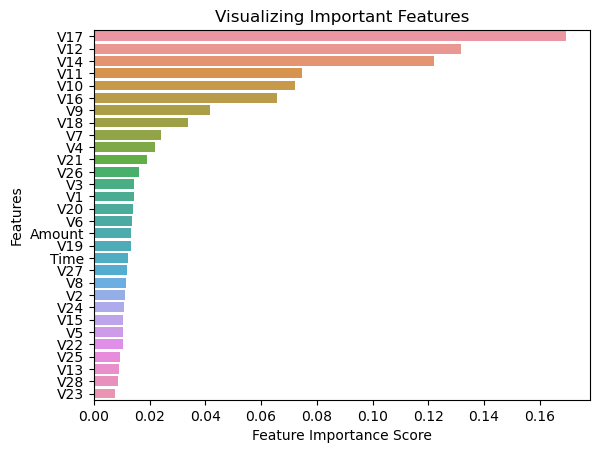

In [38]:
feature_imp = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Evaluation Metrics

In [13]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.8690748763736589


## Confusion Metrics

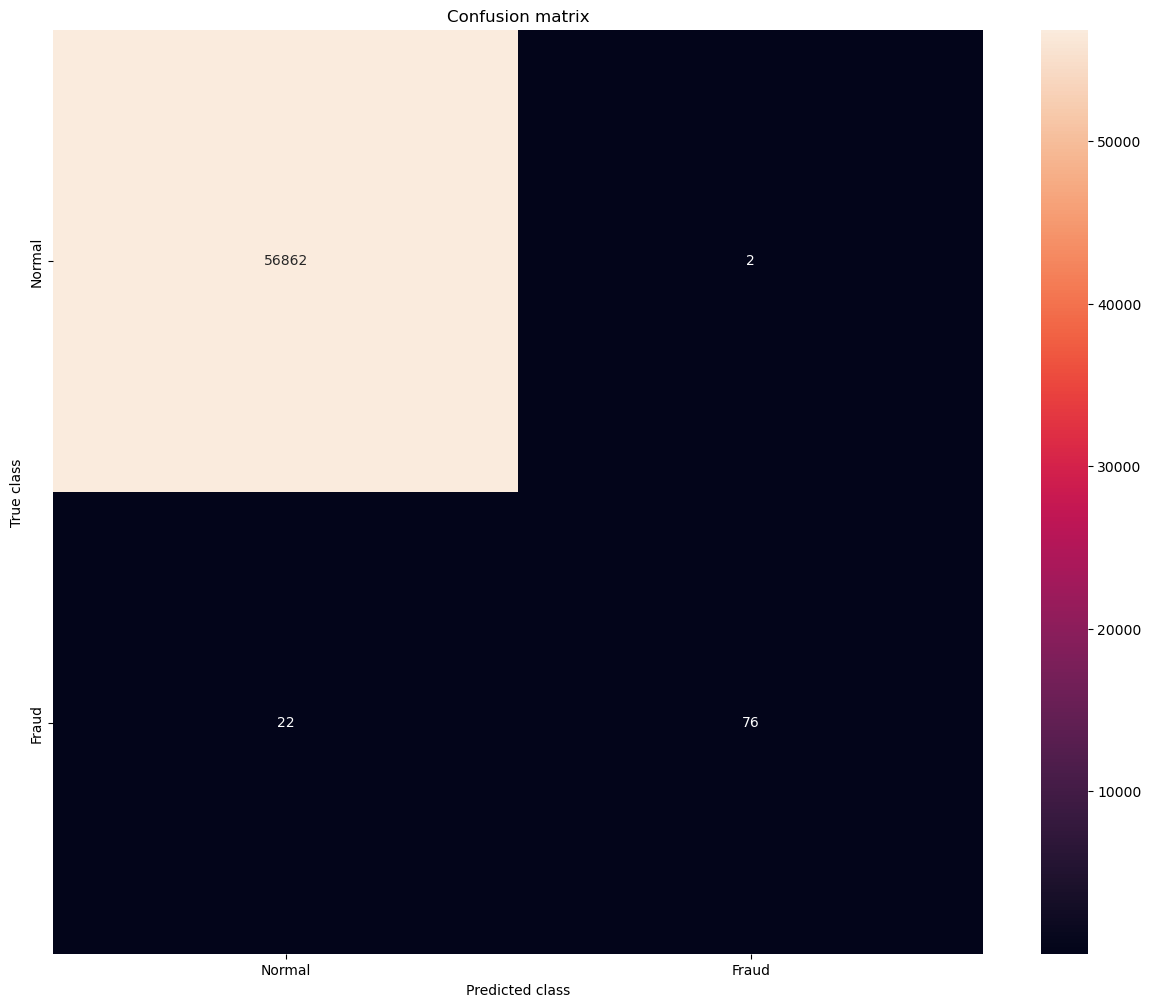

In [14]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(15, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [15]:
# Extract the number of fraud cases from the confusion matrix
fraud_cases = conf_matrix[1, 1]

# Calculate the total number of cases
total_cases = conf_matrix.sum()

# Calculate the percentage of fraud cases from the total
percentage_fraud_cases = (fraud_cases / total_cases) * 100

# Print the percentage of fraud cases
print("Percentage of fraud cases from the total: {:.2f}%".format(percentage_fraud_cases))

Percentage of fraud cases from the total: 0.13%


In [16]:
# Extract values from confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Positive:", FN)

True Positive: 76
True Negative: 56862
False Positive: 2
False Positive: 22


In [17]:
# Calculate specificity
specificity = TN / (TN + FP)

# Print specificity
print("Specificity:", specificity)

Specificity: 0.9999648283624085


In [18]:
# Calculate false positive rate (FPR)
false_positive_rate = FP / (FP + TN)

# Print false positive rate
print("False Positive Rate:", false_positive_rate)

False Positive Rate: 3.517163759144626e-05


In [19]:
# Calculate false negative rate (FNR)
false_negative_rate = FN / (FN + TP)

# Print false negative rate
print("False Negative Rate:", false_negative_rate)

False Negative Rate: 0.22448979591836735


In [20]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC
auc_roc = roc_auc_score(yTest, yPred)

# Print AUC-ROC
print("AUC-ROC:", auc_roc)


AUC-ROC: 0.8877375162220206


* The Evaluation Metrics are showcasing the classifier is working well.
* Fraud number is very less compared to total number.
* Moreover,the fraud is highly detectable in this model.

# Now, using Naive Bayes Classifier

In [21]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(xTrain, yTrain)

yPred2 = gnb.predict(xTest)

### Checking accuracy score

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(yTest, yPred2)))

Model accuracy score: 0.9930


### Compare the train-set and test-set accuracy

 comparing the train-set and test-set accuracy to check for overfitting

In [23]:
yPred2Train = gnb.predict(xTrain)

yPred2Train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(yTrain, yPred2Train)))

Training-set accuracy score: 0.9935


### Checking for overfitting and underfitting

In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(xTrain, yTrain)))

print('Test set score: {:.4f}'.format(gnb.score(xTest, yTest)))

Training set score: 0.9935
Test set score: 0.9930


The training-set accuracy score is 0.9935 while the test-set accuracy to be 0.9930. These two values are quite comparable. So, there is no sign of overfitting.

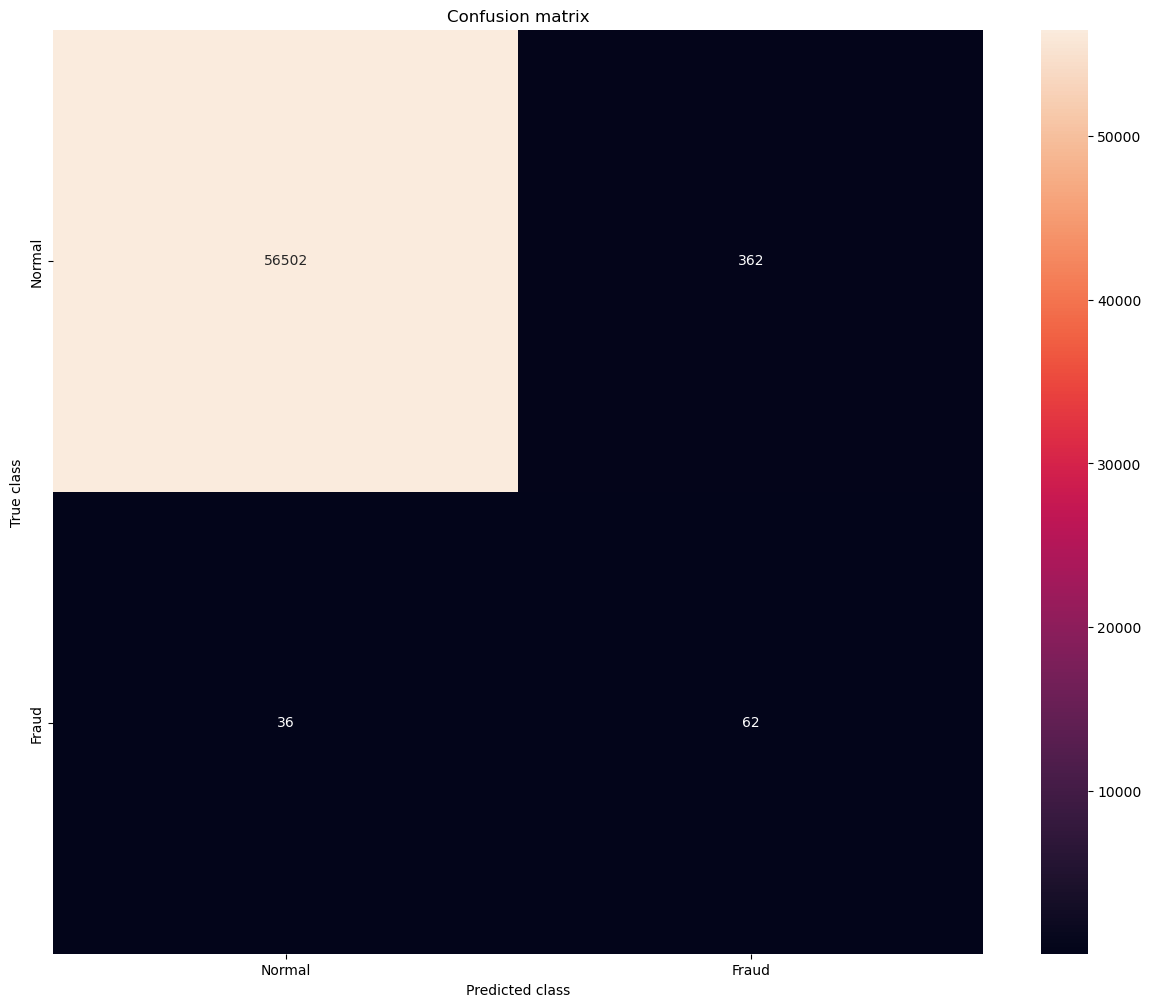

In [26]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix2 = confusion_matrix(yTest, yPred2) 
plt.figure(figsize =(15, 12)) 
sns.heatmap(conf_matrix2, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [27]:
# Extract values from confusion matrix
TN2 = conf_matrix2[0, 0]  # True Negatives
FP2 = conf_matrix2[0, 1]  # False Positives
FN2 = conf_matrix2[1, 0]  # False Negatives
TP2 = conf_matrix2[1, 1]  # True Positives

print("True Positive:", TP2)
print("True Negative:", TN2)
print("False Positive:", FP2)
print("False Positive:", FN2)

True Positive: 62
True Negative: 56502
False Positive: 362
False Positive: 36


## Evaluation Metrics

In [28]:
# Extract the number of fraud cases from the confusion matrix
fraud_cases2 = conf_matrix2[1, 1]

# Calculate the total number of cases
total_cases2 = conf_matrix2.sum()

# Calculate the percentage of fraud cases from the total
percentage_fraud_cases2 = (fraud_cases2 / total_cases2) * 100

# Print the percentage of fraud cases
print("Percentage of fraud cases from the total: {:.2f}%".format(percentage_fraud_cases2))

Percentage of fraud cases from the total: 0.11%


In [29]:
# Calculate specificity
specificity2 = TN2 / (TN2 + FP2)

# Print specificity
print("Specificity:", specificity2)

Specificity: 0.9936339335959482


In [30]:
# Calculate false positive rate (FPR)
false_positive_rate2 = FP2 / (FP2 + TN2)

# Print false positive rate
print("False Positive Rate:", false_positive_rate2)

False Positive Rate: 0.006366066404051773


In [31]:
# Calculate false negative rate (FNR)
false_negative_rate2 = FN2 / (FN2 + TP2)

# Print false negative rate
print("False Negative Rate:", false_negative_rate2)

False Negative Rate: 0.3673469387755102


In [32]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC
auc_roc2 = roc_auc_score(yTest, yPred2)

# Print AUC-ROC
print("AUC-ROC:", auc_roc2)


AUC-ROC: 0.8131434974102191


In [33]:
n_outliers = len(fraud) 
n_errors2 = (yPred2 != yTest).sum() 
print("The model used is Naive Bayes classifier") 
  
acc2 = accuracy_score(yTest, yPred2) 
print("The accuracy is {}".format(acc2)) 
  
prec2 = precision_score(yTest, yPred2) 
print("The precision is {}".format(prec2)) 
  
rec2 = recall_score(yTest, yPred2) 
print("The recall is {}".format(rec2)) 
  
f1_2 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1_2)) 
  
MCC2 = matthews_corrcoef(yTest, yPred2) 
print("The Matthews correlation coefficient is{}".format(MCC2))

The model used is Naive Bayes classifier
The accuracy is 0.9930128857835048
The precision is 0.14622641509433962
The recall is 0.6326530612244898
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.3019617859258202


# Conclusion

* Although, the accuracy is the same for both the models, the precision is far less in Naive Bayes Classifier.
* Percentage of fraud cases is slightly less in Naive Bayes Classifier.
* AUC-ROC is silghtly better in Random Forest Classifier, as well as Recall & Matthews correlation coefficient. 
* F1 score & Specificity is almost the same in both of them.
* False Positive Rate is lower in Naive Bayes Classifier, but False Negative Rate is lower in Random Forest Classifier. 
* Evaluating all the metrics, I've decieded that **Random Forest Classifier** is better for this **Credit Card Fraud Detection**.